# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from itertools import cycle 
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time 

In [2]:
# Set up the browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
time.sleep(2)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list with column names
column_names = ['ID', 'Terrestrial_Date', 'Sol', 'LS', 'Month', 'Min_Temp', 'Pressure']
rows_list = [column_names]

# Loop through the scraped data to create a list of rows
def print_rows_list():
    for index, row in enumerate(rows): 
        tds = row.find_all('td')
        row_data = [td.text.strip() for td in tds]
        rows_list.append(row_data)

    # Find the maximum length of each column
    max_lengths = [max(len(str(data)) for data in column) for column in zip(*rows_list)]

    # Print the list of rows with formatted column names
    for row_data in rows_list:
        formatted_data = [data.ljust(max_length) for data, max_length in zip(row_data, max_lengths)]
        print(' '.join(formatted_data))

print_rows_list()


ID   Terrestrial_Date Sol  LS  Month Min_Temp Pressure
2    2012-08-16       10   155 6     -75.0    739.0   
13   2012-08-17       11   156 6     -76.0    740.0   
24   2012-08-18       12   156 6     -76.0    741.0   
35   2012-08-19       13   157 6     -74.0    732.0   
46   2012-08-20       14   157 6     -74.0    740.0   
57   2012-08-21       15   158 6     -78.0    740.0   
68   2012-08-22       16   158 6     -77.0    740.0   
79   2012-08-23       17   159 6     -76.0    742.0   
112  2012-08-27       21   161 6     -74.0    741.0   
114  2012-08-28       22   162 6     -74.0    742.0   
123  2012-08-29       23   162 6     -75.0    741.0   
134  2012-08-30       24   163 6     -75.0    742.0   
145  2012-08-31       25   163 6     -75.0    743.0   
156  2012-09-01       26   164 6     -76.0    745.0   
163  2012-09-02       27   164 6     -75.0    743.0   
170  2012-09-03       28   165 6     -75.0    745.0   
171  2012-09-04       29   166 6     -75.0    747.0   
172  2012-

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows_list[1:], columns=column_names)

In [8]:
# Confirm DataFrame was created successfully
print(df)

        ID Terrestrial_Date   Sol   LS Month Min_Temp Pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
data_types = df.dtypes
print("Data Types Before Conversion:")
print(data_types)

Data Types Before Conversion:
ID                  object
Terrestrial_Date    object
Sol                 object
LS                  object
Month               object
Min_Temp            object
Pressure            object
dtype: object


In [10]:
# Change data types for data analysis
df['ID'] = pd.to_numeric(df['ID'])
df['Terrestrial_Date'] = pd.to_datetime(df['Terrestrial_Date'])
df['Sol'] = pd.to_numeric(df['Sol'])
df['LS'] = pd.to_numeric(df['LS'])
df['Month'] = pd.to_numeric(df['Month'])
df['Min_Temp'] = pd.to_numeric(df['Min_Temp'])
df['Pressure'] = pd.to_numeric(df['Pressure'])

In [11]:
# Confirm type changes were successful by examining data types again
data_types_after_conversion = df.dtypes
print("\nData Types After Conversion:")
print(data_types_after_conversion)


Data Types After Conversion:
ID                           int64
Terrestrial_Date    datetime64[ns]
Sol                          int64
LS                           int64
Month                        int64
Min_Temp                   float64
Pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?
def months_on_mars():
    number_of_months = df['Month'].nunique()
    print(f"The total amount of months on Mars is: {number_of_months}")

months_on_mars()

The total amount of months on Mars is: 12


In [23]:
# 2. How many Martian days' worth of data are there?
def martian_days_data():
    number_of_sols = df['Sol'].nunique()
    print(f"There is data for {number_of_sols} Martian Days")

martian_days_data()

There is data for 1867 Martian Days


In [25]:
# 3. What is the average low temperature by month?
def avg_low_temp():
    df['Min_Temp'] = pd.to_numeric(df['Min_Temp'], errors='coerce')
    average_low_by_month = df.groupby('Month')['Min_Temp'].mean()
    print("Average Low Monthly Temperature:")
    print(average_low_by_month)

avg_low_temp()


Average Low Monthly Temperature:
Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min_Temp, dtype: float64


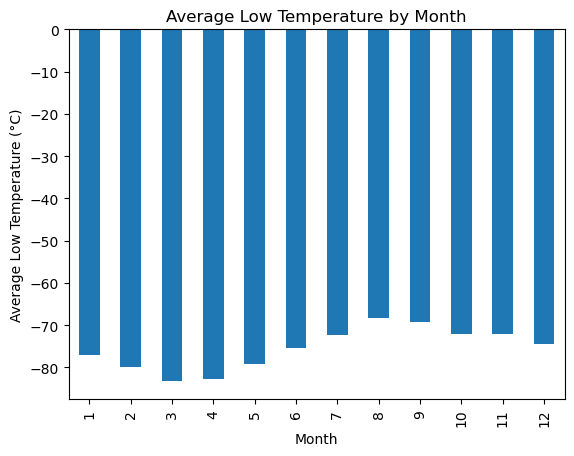

In [29]:
# Plot the average temperature by month
average_low_by_month = df.groupby('Month')['Min_Temp'].mean()
average_low_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (°C)', title='Average Low Temperature by Month')
plt.show()




In [30]:
# Identify the coldest and hottest months in Curiosity's location
def Hot_And_Cold():
    # Finding the coldest month
    coldest_month = df.loc[df['Min_Temp'].idxmin()]['Month']

    # Finding the hottest month
    hottest_month = df.loc[df['Min_Temp'].idxmax()]['Month']

    print(f"Coldest month: {coldest_month}")
    print(f"Hottest month: {hottest_month}")

Hot_And_Cold()

Coldest month: 3
Hottest month: 1


In [32]:
# 4. Average pressure by Martian month
def Martian_Month():
    average_pressure_by_month = df.groupby('Month')['Pressure'].mean()
    print("Average pressure by Martian month:")
    print(average_pressure_by_month)

Martian_Month()

Average pressure by Martian month:
Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64


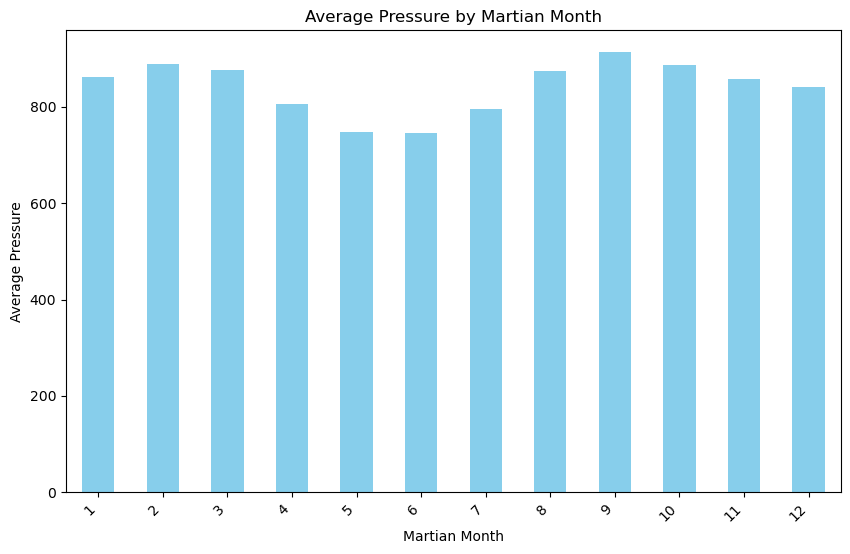

In [33]:
# Plot the average pressure by month
# Assuming df and average_pressure_by_month are already defined
average_pressure_by_month = df.groupby('Month')['Pressure'].mean()

# Plotting the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
# 5. How many terrestrial (earth) days are there in a Martian year?
def Terrestrial_Days():
    martian_orbital_period_days = 687 
    print(f'There are approximately {martian_orbital_period_days} terrestrial days in a Martian year.')

Terrestrial_Days()

There are approximately 687 terrestrial days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)


In [ ]:
browser.quit()